# Introduction

The purpose of this lab is to show how to use the **LearningCurveDisplay** class from scikit-learn to plot learning curves. Learning curves show the effect of adding more samples during the training process. We will analyze the learning curve of a naive Bayes classifier and a SVM classifier with a RBF kernel using the digits dataset. Additionally, we will look at the scalability of these predictive models by looking at their computational cost and not only at their statistical accuracy.

# Load the dataset

In [1]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

naive_bayes = GaussianNB()
svc = SVC(kernel='rbf', gamma=0.001)

# Plot the learning curves

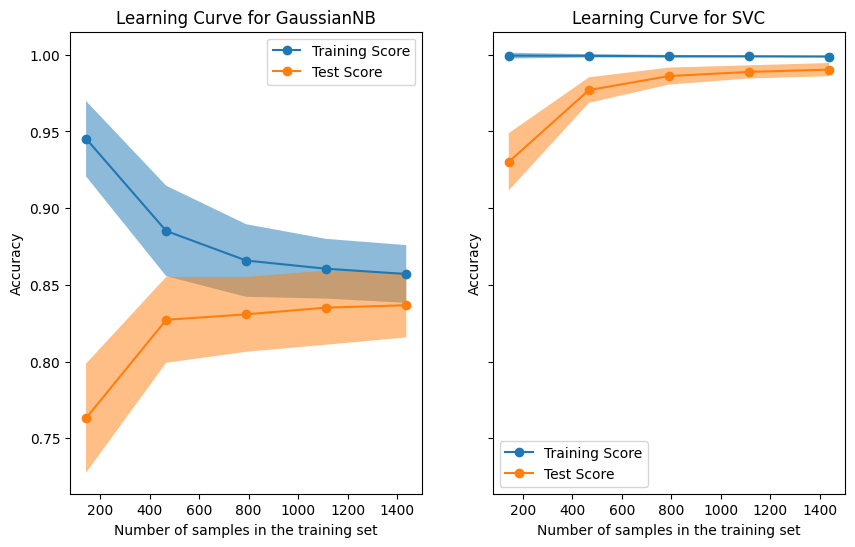

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    'X': X,
    'y': y,
    'train_sizes': np.linspace(0.1, 1.0, 5),
    'cv': ShuffleSplit(n_splits=50, test_size=0.2, random_state=42),
    'score_type':'both',
    'n_jobs':4,
    'line_kw':{'marker':'o'},
    'std_display_style':'fill_between',
    'score_name':'Accuracy',
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, ax=ax[ax_idx], **common_params)
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ['Training Score', 'Test Score'])
    ax[ax_idx].set_title(f'Learning Curve for {estimator.__class__.__name__}')

# Analyze the learning curves

We can analyze the learning curve of the naive Bayes classifier. Its shape can be found in more complex datasets very often: the training score is very high when using few samples for training and decreases when increasing the number of samples, whereas the test score is very low at the beginning and then increases when adding samples. The training and test scores become more realistic when all the samples are used for training.

We see another typical learning curve for the SVM classifier with RBF kernel. The training score remains high regardless of the size of the training set. On the other hand, the test score increases with the size of the training dataset. Indeed, it increases up to a point where it reaches a plateau. Observing such a plateau is an indication that it might not be useful to acquire new data to train the model since the generalization performance of the model will not increase anymore.

# Check the scalability of the models

In [4]:
from sklearn.model_selection import learning_curve

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}

train_sizes, _, test_scores_nb, fit_times_nb, score_times_nb = learning_curve(
    naive_bayes, **common_params
)
train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    svc, **common_params
)

# Plot the results

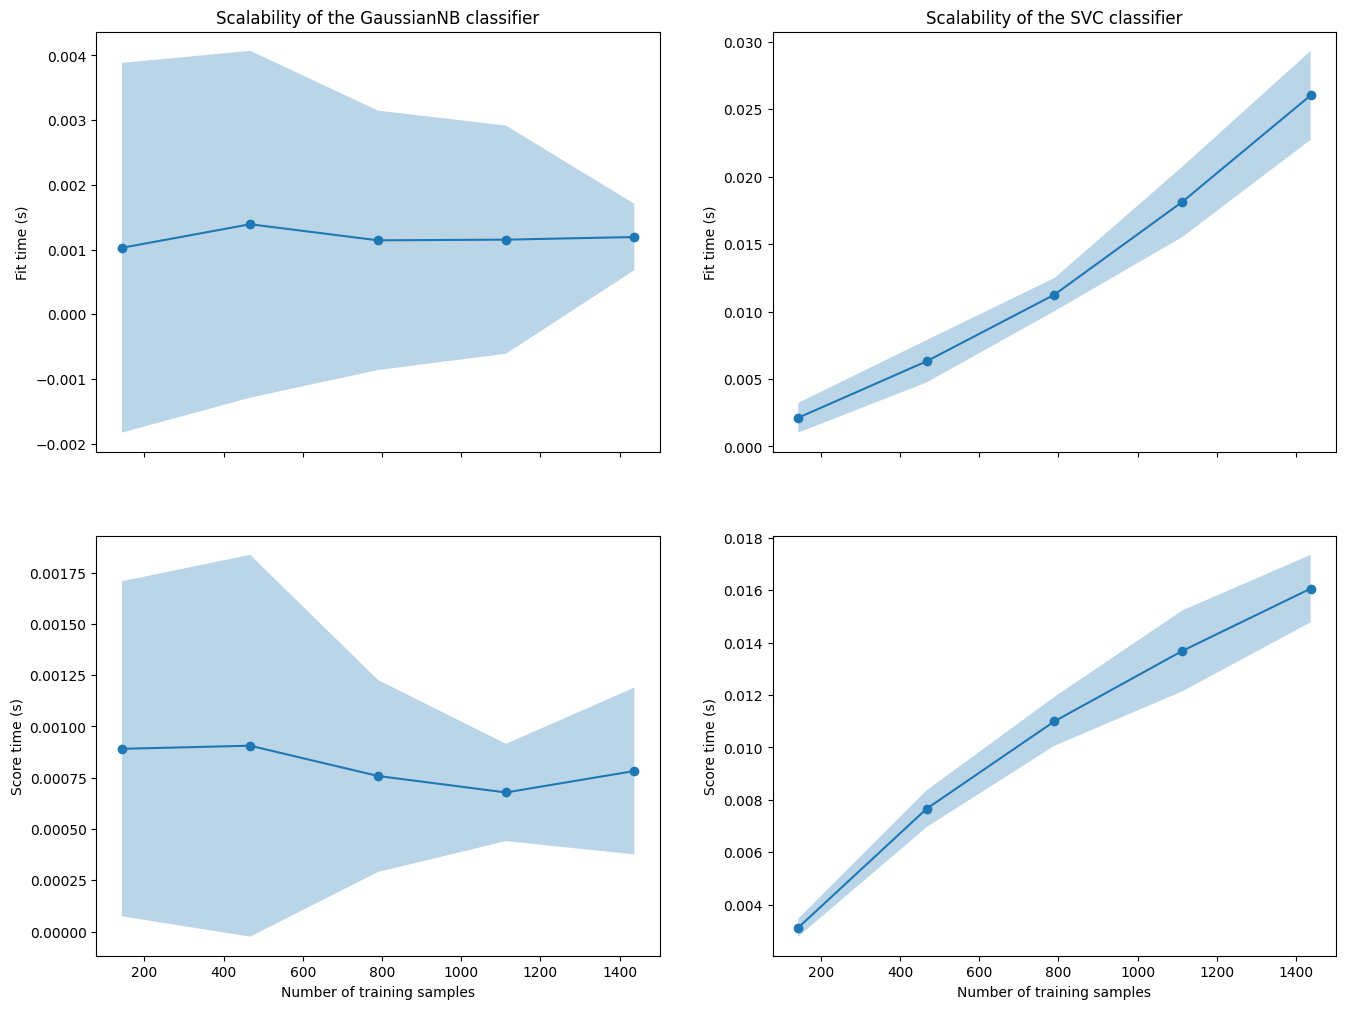

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(
    zip(
        [fit_times_nb, fit_times_svm],
        [score_times_nb, score_times_svm],
        [naive_bayes, svc],
    )
):
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(
        train_sizes,
        fit_times.mean(axis=1) - fit_times.std(axis=1),
        fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
    )
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(
        f"Scalability of the {estimator.__class__.__name__} classifier"
    )

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(
        train_sizes,
        score_times.mean(axis=1) - score_times.std(axis=1),
        score_times.mean(axis=1) + score_times.std(axis=1),
        alpha=0.3,
    )
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")

# Check the trade-off between increased training time and cross-validation score

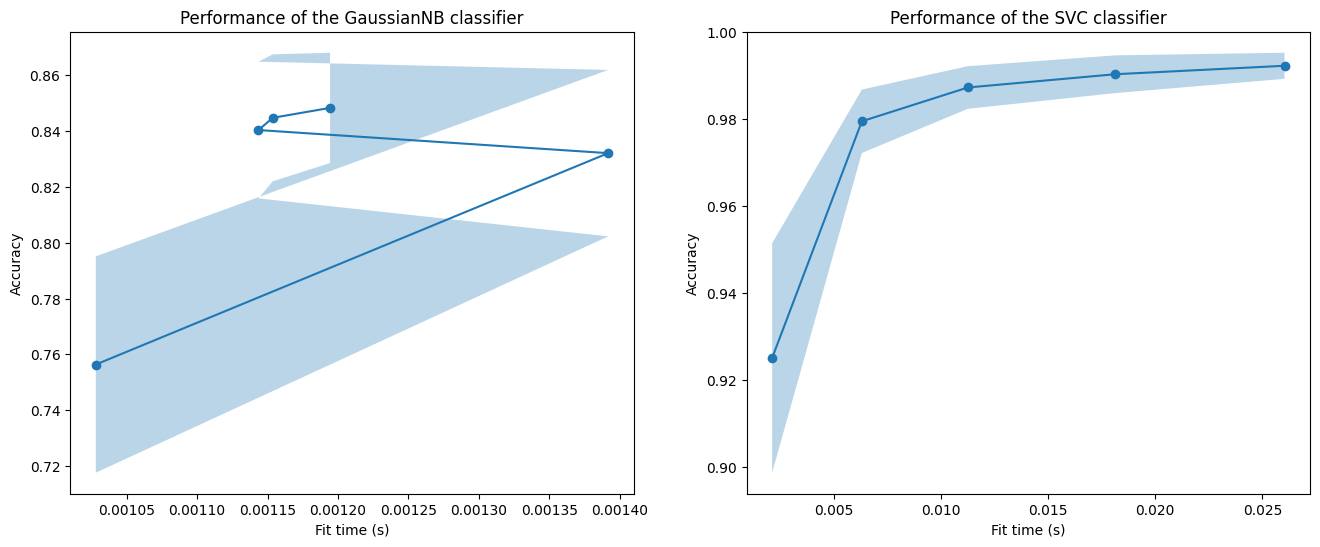

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for ax_idx, (fit_times, test_scores, estimator) in enumerate(
    zip(
        [fit_times_nb, fit_times_svm],
        [test_scores_nb, test_scores_svm],
        [naive_bayes, svc],
    )
):
    ax[ax_idx].plot(fit_times.mean(axis=1), test_scores.mean(axis=1), "o-")
    ax[ax_idx].fill_between(
        fit_times.mean(axis=1),
        test_scores.mean(axis=1) - test_scores.std(axis=1),
        test_scores.mean(axis=1) + test_scores.std(axis=1),
        alpha=0.3,
    )
    ax[ax_idx].set_ylabel("Accuracy")
    ax[ax_idx].set_xlabel("Fit time (s)")
    ax[ax_idx].set_title(
        f"Performance of the {estimator.__class__.__name__} classifier"
    )

plt.show()

# Summary

In this lab, we showed how to use the **LearningCurveDisplay** class from scikit-learn to plot learning curves. We analyzed the learning curve of a naive Bayes classifier and a SVM classifier with a RBF kernel using the digits dataset. Additionally, we looked at the scalability of these predictive models by looking at their computational cost and not only at their statistical accuracy. We saw that the scalability of the SVM and naive Bayes classifiers is very different. The SVM classifier complexity at fit and score time increases rapidly with the number of samples. In contrast, the naive Bayes classifier scales much better with a lower complexity at fit and score time. We also checked the trade-off between increased training time and the cross-validation score.